# Postman Lab AI/ML Task 2

Given is the substance abuse dataset collected from National Health Insurance Service in Korea. The original documentation available on internet is in Korean, hence I read about the features on Kaggle at https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset.

The dataset contains 23 features and 9,91,345 training examples. 


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

## Importing Dataset and performing EDA

The dataset is available locally, and is imported. It dataset is divided into dependent and independent variables. The variable DRK_YN, denoting whether or not a person drinks is taken as the target variable. Another variable SMK_stat_type_cd (whether a person used to smoke, presently smokes, or never smoked) could also be used as the target variable, but it can also act as a very important feature for prediction of DRK_YN.

The frequency of the target variable for its different values is calculated. The frequencies are almost equal, hence, there is no case of class imbalance. No manipulation is needed.

Dataset is checked for null values, which are absent in the dataset. Anyways, the missing values are replaced with the mean of the column.
The dataset is then checked for duplicate values, which are also absent. Anyways, the duplicate values are dropped.

A new column, BMI, a feature dependent on height and weight, is added, which can prove to be an important feature. But the heatmap shows that BMI has a very small correlation to the target variable, and hence it is dropped afterwards.

The categorial features (i.e. Sex) are encoded to get integer features. The target variable is also directly encoded as 0 and 1 as the classification is binary, and one hot encoding will unnecessarily increase dimensionality.

In [2]:
# importing dataset
dataset = pd.read_csv('smoking_driking_dataset_Ver01.csv')
print(dataset.shape)

(991346, 24)


In [5]:
# Number of drinkers and Non drinkers
drinkers = 0
non_drinkers = 0

for i in dataset['DRK_YN']:
    if i == 'Y':
        drinkers = drinkers + 1
for i in dataset['DRK_YN']:
    if i == 'N':
        non_drinkers = non_drinkers + 1
print("Number of drinkers: ", drinkers)
print("Number of non-drinkers: ", non_drinkers)

Number of drinkers:  495488
Number of non-drinkers:  495858


In [3]:
# importing dataset
dataset = pd.read_csv('smoking_driking_dataset_Ver01.csv')


# Adding a new column to the dataset
dataset.insert(4, 'BMI', dataset['weight'] / (dataset['height'] / 100) ** 2, True)


# Encoding categorical data Sex and target variable
dataset['sex'] = dataset['sex'].map({'Male': 1, 'Female': 0})
dataset['DRK_YN'] = dataset['DRK_YN'].map({'Y': 1, 'N': 0})


# Checking and handling null values
dataset.isnull().sum()
# dataset = dataset.dropna() # dropping null values
dataset = dataset.fillna(dataset.mean())  # filling null values with mean

# Checking for duplicate values
dataset.duplicated().sum()
dataset = dataset.drop_duplicates()  # dropping duplicate values

## Some useful visualizations

The following visualizations were plotted to get a better understanding of the data:
##### 1. The histogram of people who ever/never/presently smoke
##### 2. The histogram of people who drink or not
The visualizations 1 and 2 show a very strong correlation between age and whether or not people smoke and drink. The very young and the very old people are less likely to smoke or drink, while the middle aged people (40-50) are more likely to smoke and drink.
##### 3. Heatmap of correlation between features
The heatmap makes clear that many features have negligible correlation to the target variable, hence can be omitted from the training data, so as to save computational power and time while training models.

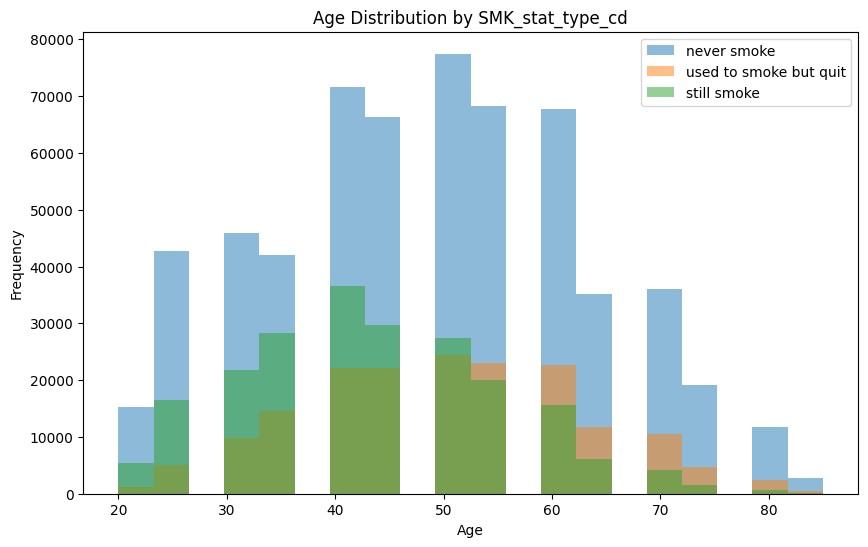

In [4]:
# Filter data based on DRK_YN values
smk_1 = dataset[dataset['SMK_stat_type_cd'] == 1]
smk_2 = dataset[dataset['SMK_stat_type_cd'] == 2]
smk_3 = dataset[dataset['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'], bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'], bins=20, alpha=0.5, label='used to smoke but quit')
plt.hist(smk_3['age'], bins=20, alpha=0.5, label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

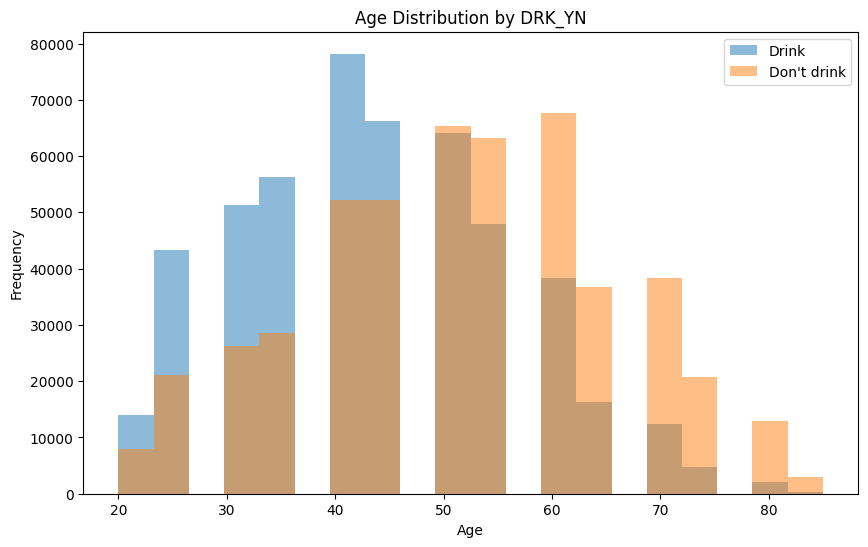

In [5]:
# Filter data based on DRK_YN values
drk_1 = dataset[dataset['DRK_YN'] == 1]
drk_2 = dataset[dataset['DRK_YN'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Don't drink")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

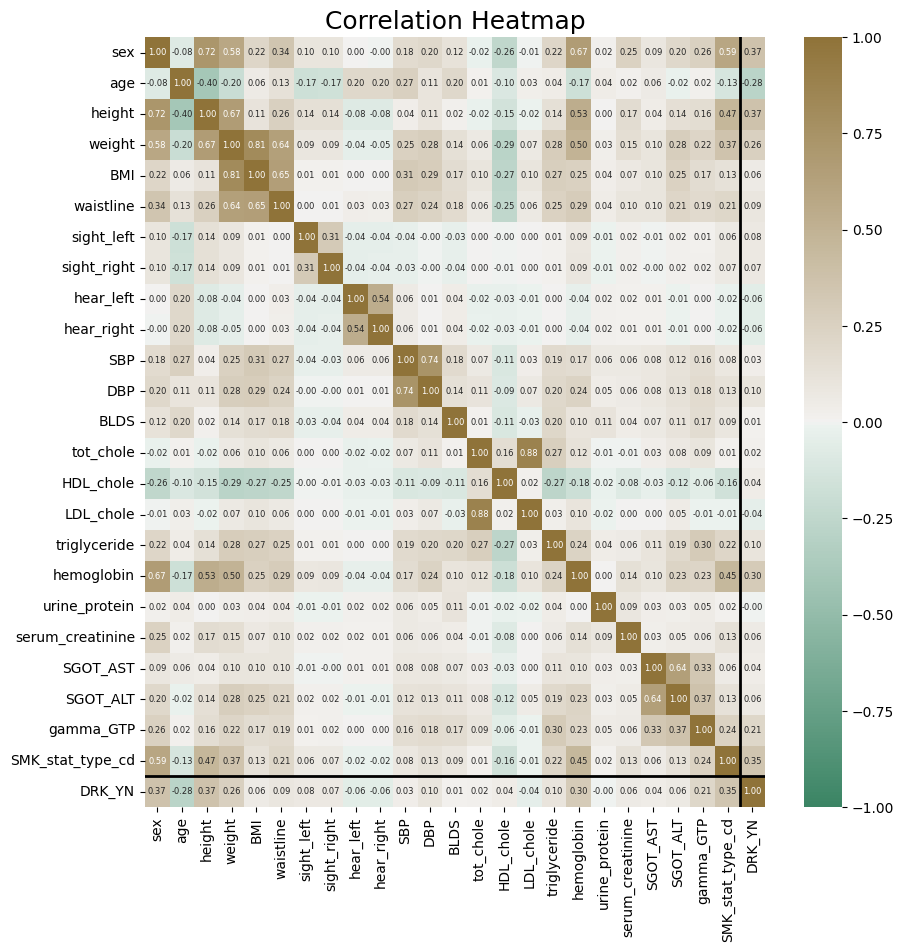

In [6]:
# Heatmap
correlation_matrix = dataset.corr()

# Specify columns to highlight
highlight_cols = ['DRK_YN']

# Create a larger heatmap with adjusted font size
plt.figure(figsize=(10, 10))

# Define custom color palette for the heatmap
cmap = sns.diverging_palette(150, 60, as_cmap=True)

# Plot the heatmap with custom colors for highlighted columns
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", annot_kws={"size": 6},
            cbar_kws={"shrink": 1}, vmin=-1, vmax=1)

# Highlight columns by drawing lines around them
for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.columns[i] in highlight_cols:
        plt.axhline(i, color='k', linewidth=2)
        plt.axvline(i, color='k', linewidth=2)

plt.title('Correlation Heatmap', fontsize=18)
plt.show()

The features with correlation between -0.05 and 0.05 with the target variable are removed. Then the dataset is split into training and testing data.

In [7]:
# Removing features with correlation less than 0.05
correlation_threshold = 0.05
DRK_features = []
for feature in correlation_matrix.columns:
    if feature != 'DRK_YN' and (correlation_matrix[feature]['DRK_YN'] > correlation_threshold or
                                correlation_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print(str(len(DRK_features) ) + " features are correlated with 'DRK_YN':")
print(DRK_features)

X = dataset[DRK_features]
y = dataset['DRK_YN']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y
                                                    , test_size = 0.2
                                                    , random_state = 43
                                                    , stratify = y)

17 features are correlated with 'DRK_YN':
['sex', 'age', 'height', 'weight', 'BMI', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'DBP', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']


### Checking for Outliers

The outliers are checked using z-value, and those with a z-value greater than 3 are dropped.

We have a lot of data, hence we can easily afford removing the outliers, in other cases, with less amount of data, mean imputation can be used.

In [8]:
# Checking for outliers

from scipy import stats
z = np.abs(stats.zscore(X_train))

threshold = 3

# Removing outliers
X_train = X_train[((z > threshold) | (z < -threshold)).any(axis=1)]
y_train = y_train[((z > threshold) | (z < -threshold)).any(axis=1)]


## Training Models

We use 8 models, they are trained and tested, and the accuracy scores are calculated. The accuracy scores are as follows:

1. Logistic Regression: 70.79%
2. Random Forest: 71.9%
3. k-NearestNeighbour: 66.42%
4. Support Vector Machine: 66.07%
5. Decision Tree: 63.81%
6. Gaussian Naive Bayes: 69.54%
7. XGBoost: 72.1%
8. Deep Neural Network: 72.5%

The best models clearly are RandomForest, XGBoost and Deep Neural Network, with accuracy scores of 71.75%, 72.1% and 72.5% respectively. The training time for XGBoost is much much less than both others and such a small trade with accuracy can be made to reduce the training time significantly. Hence the best model is XGBoost.

In [9]:
# Model 1 : Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000, fit_intercept=False)
lr.fit(X_train, y_train)

# predicting the test set results
y_pred = lr.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7079449622725256


In [35]:
# Model 2 : RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200,
                             criterion = "entropy",
                             random_state = 43)
rfc.fit(X_train, y_train)

# predicting the test set results
y_pred = rfc.predict(X_test)

# accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7191976354759311


In [11]:
# Model 3 : K-nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)   

kNN.predict(X_test)
print('Accuracy: ', kNN.score(X_test, y_test))


Accuracy:  0.664225477141589


Giving a large dataset to SVM is not a good idea, as they take a lot of time to train. Hence, we use a smaller dataset for SVM.

The accuracy of SVM, as calculated using the complete dataset, on colab is 66.07%, which is quite less than the accuracy of other models. Hence, SVM is not a good choice for this dataset.

In [35]:
# Model 4 : SVM
from sklearn.svm import SVC
svm = SVC()

X_train_small = X_train[0:10000]
y_train_small = y_train[0:10000]

svm.fit(X_train, y_train)
svm.predict(X_test)
print('Accuracy: ', svm.score(X_test, y_test))


In [12]:
# Model 5 : Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc.predict(X_test)
print('Accuracy: ', dtc.score(X_test, y_test))

Accuracy:  0.6370748093451156


In [13]:
# Model 6 : Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

nb.predict(X_test)
print('Accuracy: ', nb.score(X_test, y_test))

Accuracy:  0.6954414316265182


In [21]:
# Model 7 : XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb.predict(X_test)
print('Accuracy: ', xgb.score(X_test, y_test))

Accuracy:  0.7210285276197393


First I used a very simple neural network with 3 layers. The accuracy was worse than the other classifiers. This was probably because of the small size of the neural network. Hence, I used a deeper neural network with 5 hidden layers, and the accuracy was better than the other classifiers, that is 72.5%, which is much better than the other classifiers. THe time taken for training is also not much.

The number of epochs are set to 50, and as the graph shows, there aren't signs of overfitting. I tried increasing the epochs to 100, but there was no significant change in the accuracy.

In [18]:
# Model 7 : Deep Neural Network with 3 layers (2 hidden layers)
from keras import models
from keras import layers

DNN = models.Sequential()
DNN.add(layers.Dense(16, activation="relu", input_shape=(17,)))  # 16 hidden units, as input size is 17
DNN.add(layers.Dense(16, activation="relu"))
DNN.add(layers.Dense(16, activation="relu"))
DNN.add(layers.Dense(8, activation="relu"))
DNN.add(layers.Dense(8, activation="relu"))
DNN.add(layers.Dense(1, activation="sigmoid"))

DNN.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

partial_x_train, X_val, partial_y_train, y_val = train_test_split(X_train, y_train,
                                                                  test_size = 0.06,
                                                                  random_state = 43,
                                                                  stratify = y_train)

history = DNN.fit(partial_x_train,
                  partial_y_train,
                  epochs = 50,
                  batch_size = 512,
                  validation_data=(X_val, y_val))

print(DNN.evaluate(X_test, y_test))

Epoch 1/100
153/153 [==============================] - 2s 4ms/step - loss: 1.1902 - accuracy: 0.6292 - val_loss: 0.5673 - val_accuracy: 0.7183
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7268 - val_loss: 0.5511 - val_accuracy: 0.7247
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7370 - val_loss: 0.5278 - val_accuracy: 0.7421
Epoch 4/100
153/153 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7435 - val_loss: 0.5269 - val_accuracy: 0.7481
Epoch 5/100
153/153 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.7486 - val_loss: 0.5202 - val_accuracy: 0.7449
Epoch 6/100
153/153 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7518 - val_loss: 0.5235 - val_accuracy: 0.7549
Epoch 7/100
153/153 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7557 - val_loss: 0.5031 - val_accuracy: 0.7563

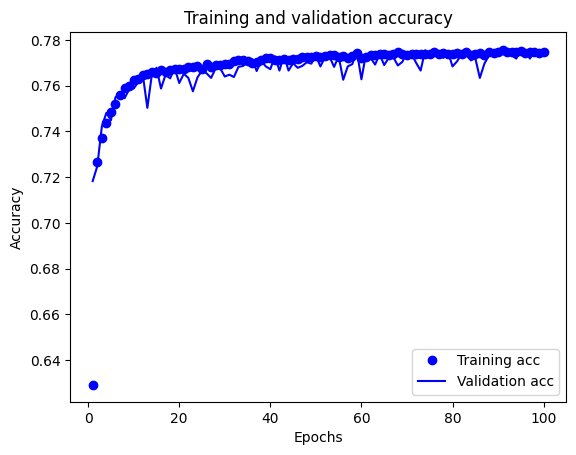

In [19]:
# Plotting the training and validation loss

history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()